[Project Purpose] The purpose of this project is to develop a machine learning model capable of accurately predicting hotel cancellation rates using a range of independent variables. Afterward, we can deploy this machine learning model to empower businesses with the ability to make informed decisions, leading to the reduction of cancellations and the optimization of customer satisfaction levels.

[Author]: Henry Ho, William Ng, Issac Tse, Flora Ho, Will Yeung

[Dataset]
* hotel: The type of hotel, either "City Hotel" or "Resort Hotel."
* is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).
* lead_time: Number of days between booking and arrival.
* arrival_date_year: Year of arrival date.
* arrival_date_month: Month of arrival date.
* arrival_date_week_number: Week number of arrival date.
* arrival_date_day_of_month: Day of the month of arrival date.
* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.
* stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.
* adults: Number of adults.
* children: Number of children.
* babies: Number of babies.
* meal: Type of meal booked.
* country: Country of origin.
* market_segment: Market segment designation.
* distribution_channel: Booking distribution channel.
* is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).
* previous_cancellations: Number of previous booking cancellations.
* previous_bookings_not_canceled: Number of previous bookings not cancelled.
* reserved_room_type: Code of room type reserved.
* assigned_room_type: Code of room type assigned at check-in.
* booking_changes: Number of changes/amendments made to the booking.
* deposit_type: Type of deposit made.
* agent: ID of the travel agency.
* company: ID of the company.
* days_in_waiting_list: Number of days in the waiting list before booking.
* customer_type: Type of booking.
* adr: Average daily rate.
* required_car_parking_spaces: Number of car parking spaces required.
* total_of_special_requests: Number of special requests made.
* reservation_status: Reservation last status.
* reservation_status_date: Date of the last status.
* name: Guest's name. (Not Real)
* email: Guest's email address.(Not Real)
* phone-number: Guest's phone number. (Not Real)
* credit_card: Guest's credit card details. (Not Real)

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import plotly.express as px
import folium

# Importing the data
file_path = "/kaggle/input/booking-data/hotel_booking.csv"
data_source = pd.read_csv(file_path)

In [2]:
# Inspecting the dataframe
print(data_source.head().T)

                                                          0  \
hotel                                          Resort Hotel   
is_canceled                                               0   
lead_time                                               342   
arrival_date_year                                      2015   
arrival_date_month                                     July   
arrival_date_week_number                                 27   
arrival_date_day_of_month                                 1   
stays_in_weekend_nights                                   0   
stays_in_week_nights                                      0   
adults                                                    2   
children                                                0.0   
babies                                                    0   
meal                                                     BB   
country                                                 PRT   
market_segment                                       Di

In [3]:
# Let's check the dimensions of the dataframe
data = data_source.copy()
data.shape

(119390, 36)

In [4]:
# let's look at the statistical aspects of the dataframe
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
# Let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data Preparation**

Deal with duplicate

In [7]:
duplicates = data.duplicated()

# Print the number of duplicates
print(f"Number of duplicate rows = {duplicates.sum()}")

Number of duplicate rows = 0


Deal with the uniformity in "Date"

In [8]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['year'] = data['reservation_status_date'].dt.year
data['month'] = data['reservation_status_date'].dt.month
data['day'] = data['reservation_status_date'].dt.day

Deal with missing values

In [9]:
# check for missing value
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:

#1.Replace missing value in numeric field "company", "agent", "children" to zero and categorical value "country" to "Unknown" as the booking was most likely made without those values.
missing_value_replacements = {"children": 0.0, "country": "Unknown", "agent": 0, "company": 0}
data = data.fillna(missing_value_replacements)

#2. There are values "undefined" found in the meal variable. The unspecified record should be replaced with "SC" - Self Catering
data["meal"] = data["meal"].replace("Undefined", "SC")

#3 Removes rows from the dataset that do not contain any values for adults, children, or babies since these instances cannot be properly classified or analyzed.
zero_guests = list(data.loc[data["adults"]
                   + data["children"]
                   + data["babies"]==0].index)
data.drop(data.index[zero_guests], inplace=True)

Deal with outliers

In [11]:
from scipy import stats
# Calculate Z-scores
z_scores = stats.zscore(data['adr'])

# Identify outliers
outliers = np.abs(z_scores) > 6

# Display outliers
print("Outliers:")
print(data.loc[outliers, 'adr'])

# Create a new DataFrame excluding outliers
data = data[~outliers]

Outliers:
13142      450.00
13391      437.00
15083      508.00
39155      426.25
48515     5400.00
103912     451.50
111403     510.00
Name: adr, dtype: float64


# **Exploratory Data Analysis (EDA)**

Based on the data set, we would like to know:

1. How often is the room being cancelled?
1. What is the price of room being cancelled?
1. Which type of room is the post prestigous one? 
1. How does the room price vary over the year? 
1. Which month have the highest number of cancellation?
1. What is the origin of the guests who cancelled their room booking?
1. Which country has the highest cancellation rate? 
1. What is the correlation between booking cancellation and independent variables?

*1. How often is the room being cancelled?*

In [12]:
# Total number of bookings
total_bookings = len(data)

# Number of cancelled bookings
cancelled_bookings = len(data[data['is_canceled'] == 1])

# Cancellation rate
cancellation_rate = (cancelled_bookings / total_bookings) * 100

print(f'Total number of bookings: {total_bookings}')
print(f'Number of cancelled bookings: {cancelled_bookings}')
print(f'Overall cancellation rate: {cancellation_rate:.2f}%')

Total number of bookings: 119203
Number of cancelled bookings: 44196
Overall cancellation rate: 37.08%


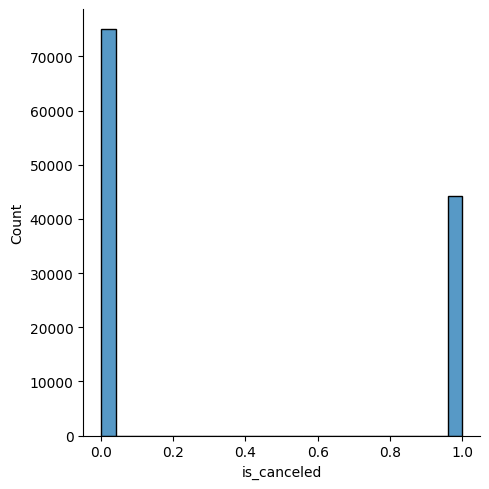

In [13]:
sns.displot(data=data, x='is_canceled', kde=False)

*2. What is the price of room being cancelled? (Mean/Max/Min/Distribution/Different Room Type)*

In [14]:
data[data['is_canceled'] == True]['adr'].describe()

count    44196.000000
mean       104.888580
std         46.039628
min          0.000000
25%         72.800000
50%         96.300000
75%        127.670000
max        392.000000
Name: adr, dtype: float64

<Figure size 1200x800 with 0 Axes>

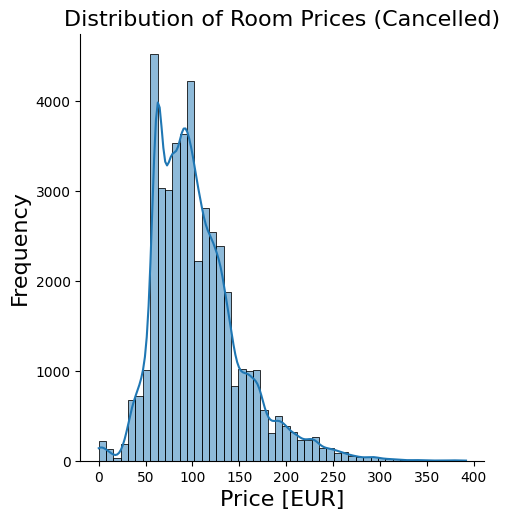

In [15]:
# Create the displot
plt.figure(figsize=(12, 8))
sns.displot(data[data['is_canceled'] == True]['adr'], bins=50, kde=True)
plt.title("Distribution of Room Prices (Cancelled)", fontsize=16)
plt.xlabel("Price [EUR]", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

In [16]:
data[data['is_canceled'] == False]['adr'].describe()

count    75007.000000
mean       100.149280
std         48.995265
min         -6.380000
25%         67.760000
50%         92.700000
75%        125.000000
max        402.000000
Name: adr, dtype: float64

<Figure size 1200x800 with 0 Axes>

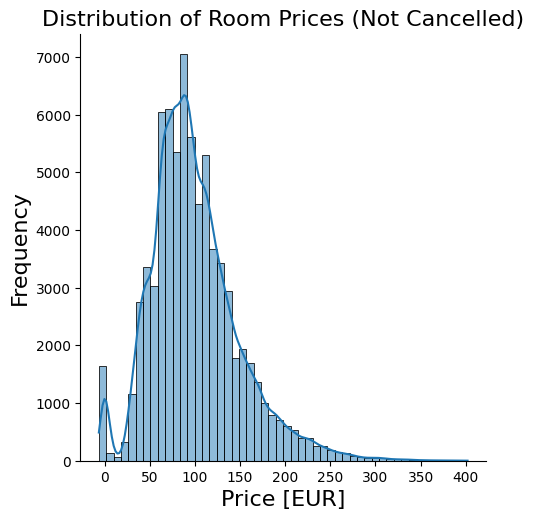

In [17]:
# Create the displot
plt.figure(figsize=(12, 8))
sns.displot(data[data['is_canceled'] == False]['adr'], bins=50, kde=True)
plt.title("Distribution of Room Prices (Not Cancelled)", fontsize=16)
plt.xlabel("Price [EUR]", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

We can see that those room being cancelled is slightly higher than that of not being cancelled

*3. Which room type of room is the most prestigous??*

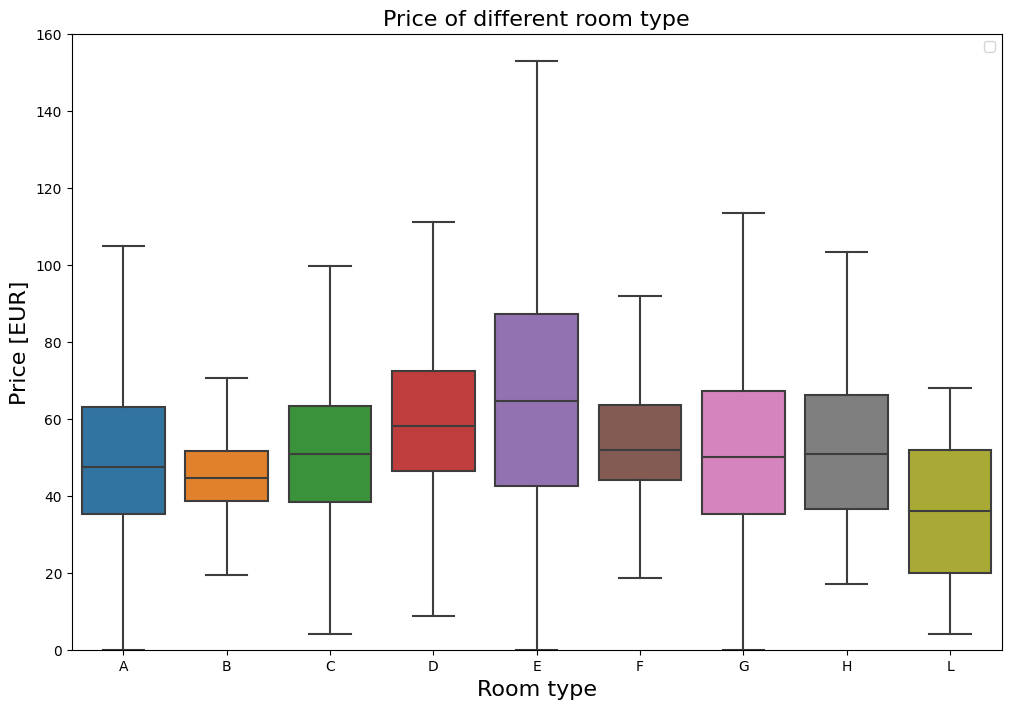

In [18]:
# Subset and normalize the data:
data["adr_pp"] = data[data['is_canceled'] == True]['adr'] / (data["adults"] + data["children"])
data_cancelled_room = data.loc[data["is_canceled"] == 1] # only those room being cancelled
room_prices = data_cancelled_room[["reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            data=room_prices,
            fliersize=0)
plt.title("Price of different room type", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

Room Type E seems to be the most prestigous room

*4. How does room price vary over the year?*

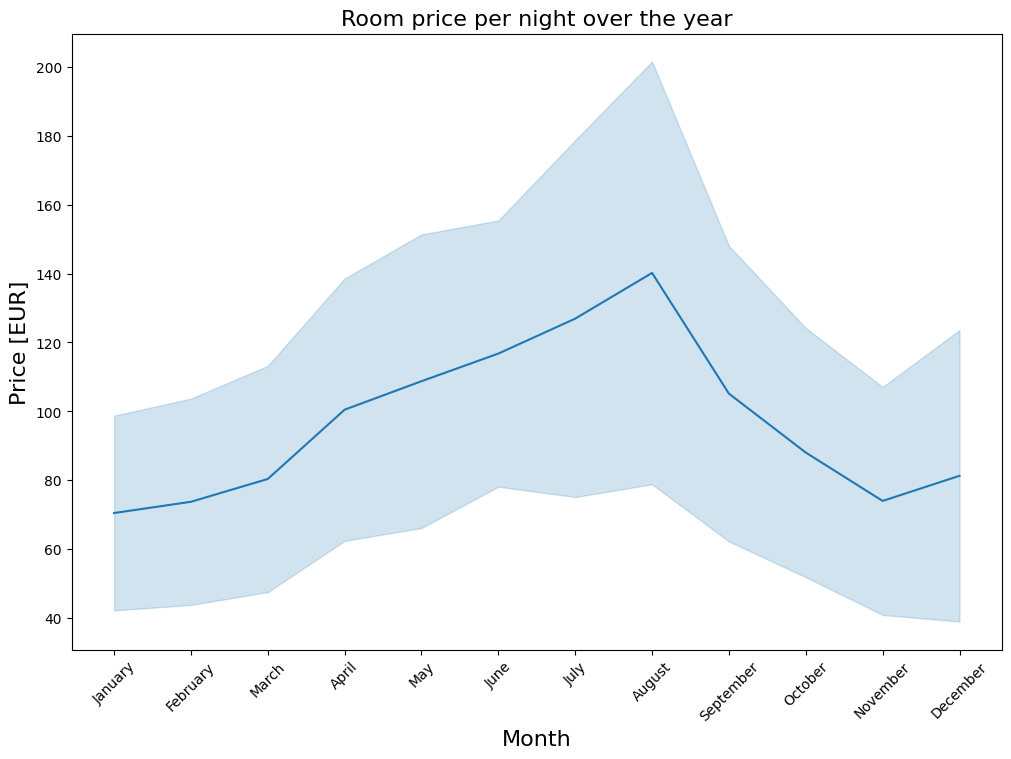

In [19]:
# Subset the data:
room_prices_monthly = data[["arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

# Barplot :
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", ci = "sd", data=room_prices_monthly)
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

*5. Which month has the highest number of cancellation?*

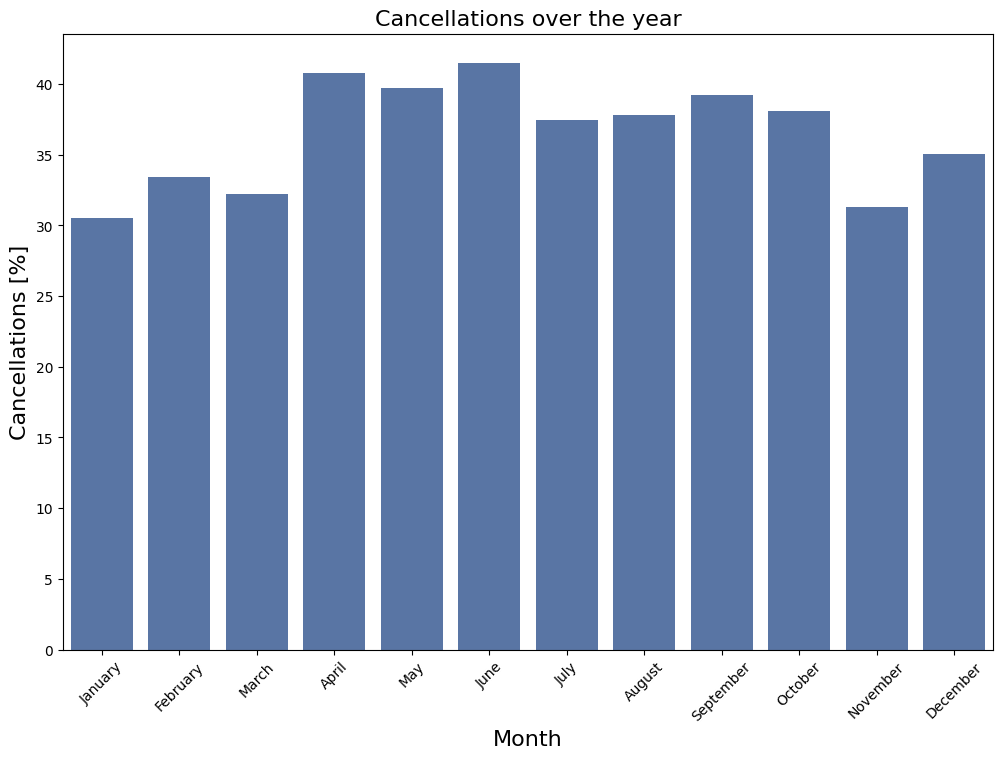

In [20]:
# Create a DataFrame with the relevant data:
book_per_month = data.groupby("arrival_date_month")["hotel"].count()
cancel_per_month = data.groupby("arrival_date_month")["is_canceled"].sum()

cancel_data = pd.DataFrame({
    "Month": list(book_per_month.index),
    "Bookings": list(book_per_month.values),
    "Cancelations": list(cancel_per_month.values)
})

cancel_data["cancel_percent"] = cancel_data["Cancelations"] / cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
cancel_data["Month"] = pd.Categorical(cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent", color=sns.color_palette("deep")[0], data=cancel_data)

plt.title("Cancellations over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellations [%]", fontsize=16)
plt.show()

*6. What is the origin of the guests who cancelled their room booking?*

In [21]:
# Get the number of guests who cancelled their booking by country
country_data = pd.DataFrame(data.loc[data["is_canceled"] == 1]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"count": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests who cancelled booking",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [22]:
# Define the color scale
color_scale = px.colors.sequential.deep

guest_map = px.choropleth(country_data,
                          locations=country_data.index,
                          color=country_data["Number of Guests"],
                          hover_name=country_data.index,
                          color_continuous_scale=color_scale,
                          title="Guest cancelling booking",
                          projection="natural earth")

guest_map.update_layout(
    title=dict(text="Number of Guests who cancelled booking", x=0.5, y=0.95, xanchor='center', yanchor='top', font=dict(color='black', size=24)),
    geo=dict(bgcolor='white', showframe=False, showcoastlines=False, projection_type="natural earth"),
    paper_bgcolor='white',
    plot_bgcolor='white',
    coloraxis_colorbar=dict(
        x=0.83,  # Adjust the x-position of the color bar
        tickfont=dict(color='black'),
        titlefont=dict(color='black'),
    )
)

*7. Which country has the highest cancellation rate?*

In [23]:
# Get the total number of guests and number of cancellations by country
total_guests_by_country = data["country"].value_counts()
cancelled_guests_by_country = data.loc[data["is_canceled"] == 1, "country"].value_counts()

# Calculate the percentage of cancellations by country
cancellation_rate_by_country = (cancelled_guests_by_country / total_guests_by_country * 100).reset_index()
cancellation_rate_by_country.columns = ["country", "Cancellation Rate"]

# Ensure country code column is in the correct format
cancellation_rate_by_country["country"] = cancellation_rate_by_country["country"].astype(str)
# Create a choropleth map
fig = px.choropleth(cancellation_rate_by_country,
                    locations="country",
                    color="Cancellation Rate",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.amp,
                    hover_data=["Cancellation Rate"],
                    title="Cancellation Rate by Country",
                    labels={"Cancellation Rate": "% Cancelled"},
                    projection="equirectangular")

# Create a choropleth map
fig = px.choropleth(cancellation_rate_by_country,
                    locations="country",
                    color="Cancellation Rate",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.amp,
                    hover_data=["Cancellation Rate"],
                    title="Cancellation Rate by Country",
                    labels={"Cancellation Rate": "% Cancelled"},
                    projection="equirectangular")

# Center the title and set the title font size
fig.update_layout(
    title={
        'text': "Cancellation Rate by Country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Move the color scale closer to the map
fig.update_coloraxes(colorbar=dict(x=0.75))

fig.show()

*8. What is the correlation among variables?*

<Axes: >

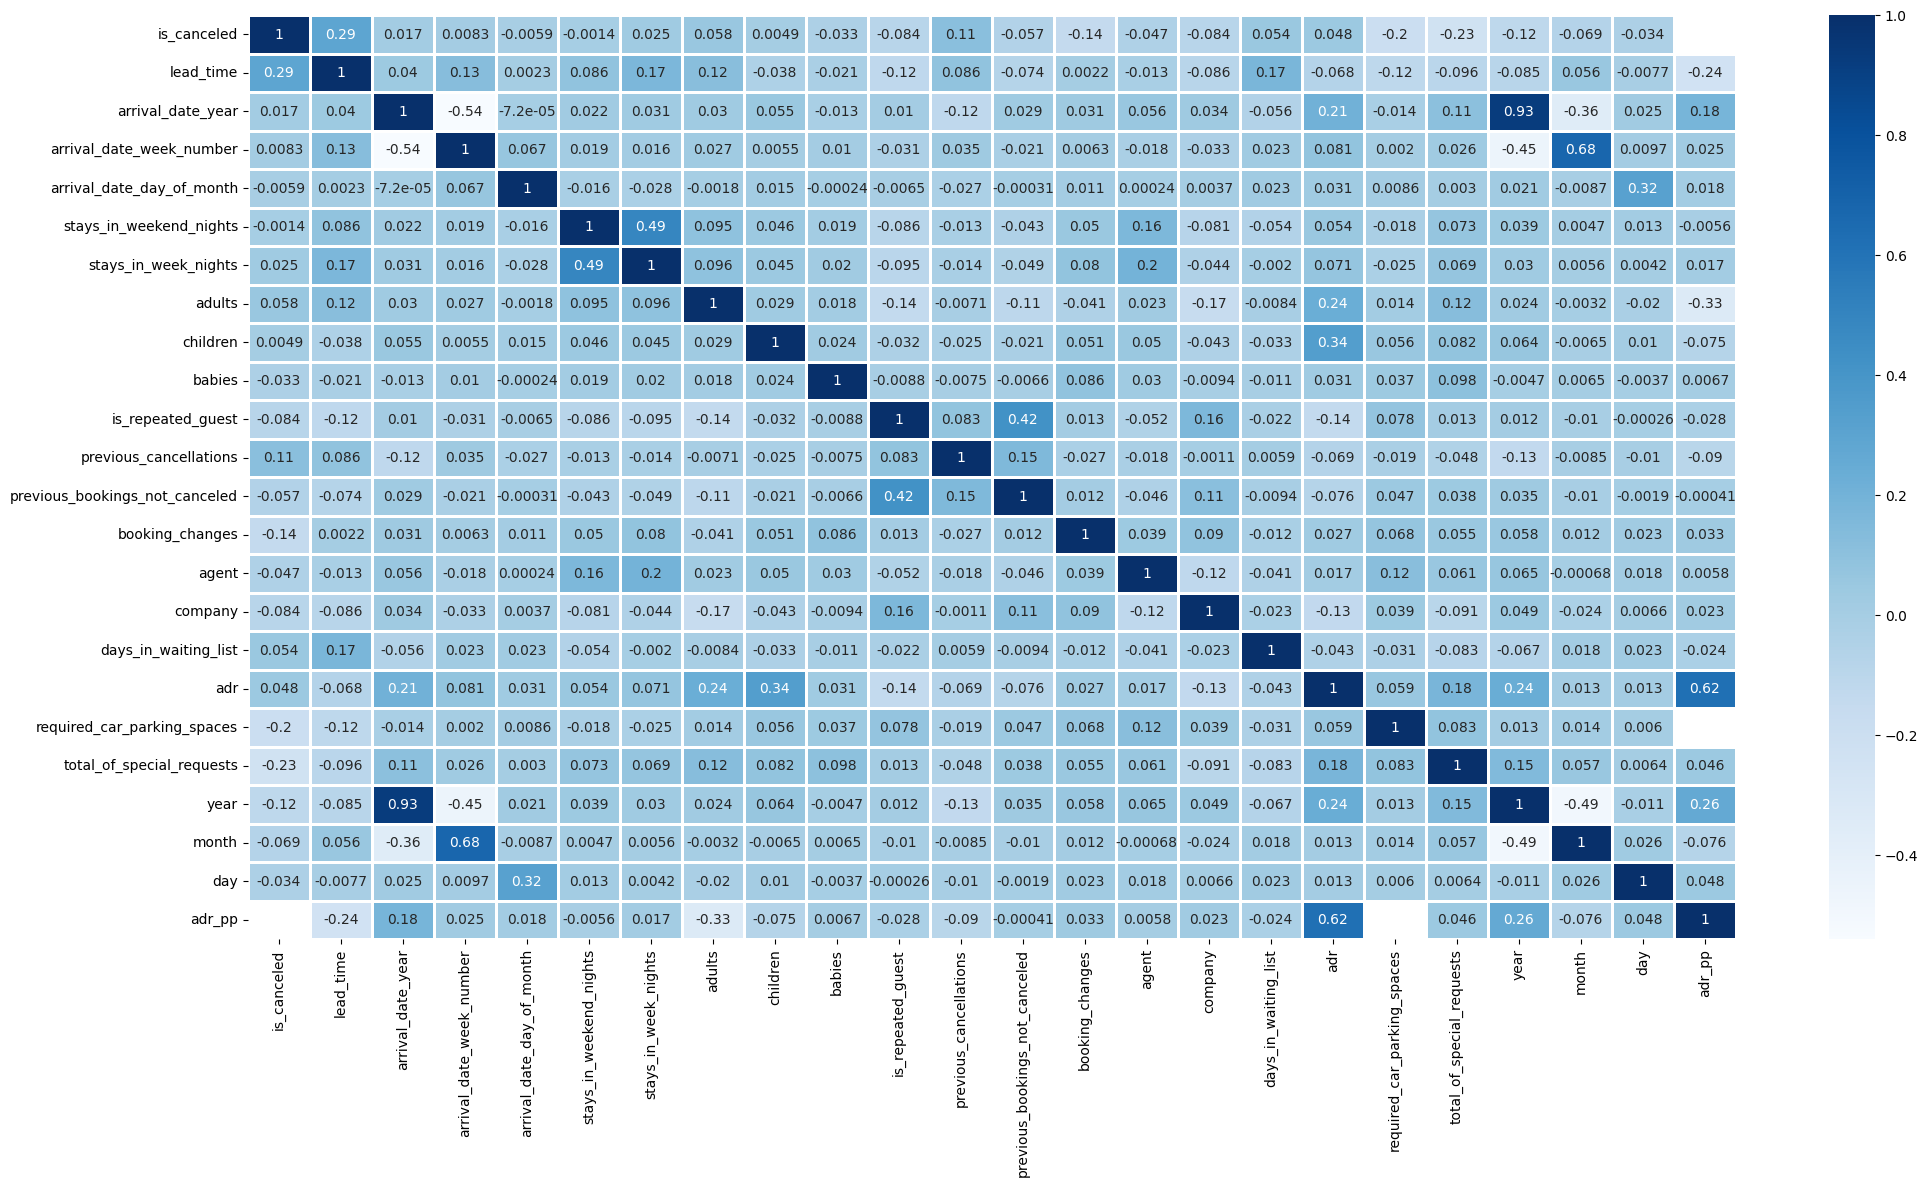

In [24]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=[np.number])

# Now you can safely compute the correlation matrix
plt.figure(figsize=(24, 12))
sns.heatmap(numerical_data.corr(), annot=True, linewidths=1, cmap="Blues")

# **Data Preparation for Machine Learning Model**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Feature Engineering**

In [26]:
#Create a new feature "stays_in_total_duration" to capture the total duration of the customer's reservation in days
data.insert(7, 'stays_in_total_duration', data['stays_in_weekend_nights'] + data['stays_in_week_nights'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119203 entries, 0 to 119389
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119203 non-null  object        
 1   is_canceled                     119203 non-null  int64         
 2   lead_time                       119203 non-null  int64         
 3   arrival_date_year               119203 non-null  int64         
 4   arrival_date_month              119203 non-null  object        
 5   arrival_date_week_number        119203 non-null  int64         
 6   arrival_date_day_of_month       119203 non-null  int64         
 7   stays_in_total_duration         119203 non-null  int64         
 8   stays_in_weekend_nights         119203 non-null  int64         
 9   stays_in_week_nights            119203 non-null  int64         
 10  adults                          119203 non-null  int64       

**Features selection**

In [28]:
limited_col = ['hotel',
               'lead_time',
               'arrival_date_month',
               'stays_in_week_nights',
               'stays_in_weekend_nights',
               'stays_in_total_duration',
               'adults',
               'children',
               'babies',
               'meal',
               'market_segment',
               'distribution_channel',
               'is_repeated_guest',
               'previous_cancellations',
               'previous_bookings_not_canceled',
               'reserved_room_type',
               'booking_changes',
               'deposit_type',
               'days_in_waiting_list',
               'customer_type',
               'adr',
               'required_car_parking_spaces',
               'total_of_special_requests'
]

data_features = data[limited_col]

**Encoding**

In [29]:
print(data_features.columns)


Index(['hotel', 'lead_time', 'arrival_date_month', 'stays_in_week_nights',
       'stays_in_weekend_nights', 'stays_in_total_duration', 'adults',
       'children', 'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [30]:
data_features = pd.get_dummies(data_features, columns=['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
                                    'deposit_type', 'customer_type'], drop_first=True)

**Split dataset for training and validation**

In [31]:

# Putting feature variable to X
X = data_features

# Putting response variable to y
y = data['is_canceled']

# Splitting the data into train and test
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Normalize continuous variables**

In [32]:
# Setting up a scaler.
scaler = StandardScaler()

#Standardizing the columns in the training dataset using the mean and standard deviation of the training data.
X_train_LR[['lead_time','stays_in_weekend_nights','stays_in_week_nights', 'stays_in_total_duration', 'days_in_waiting_list', 'adr', 'total_of_special_requests']] = scaler.fit_transform(X_train_LR[['lead_time','stays_in_weekend_nights','stays_in_week_nights', 'stays_in_total_duration', 'days_in_waiting_list', 'adr', 'total_of_special_requests']])

When scaling the test set, you should use the mean and standard deviation learned from the training set. This ensures that both the training and test datasets are standardized in the same way, maintaining consistency.

In [33]:
# Applying the same transformation to the same columns in the test dataset using the mean
# and standard deviation learned from the training data.
X_test_LR[['lead_time','stays_in_weekend_nights','stays_in_week_nights', 'stays_in_total_duration', 'days_in_waiting_list', 'adr', 'total_of_special_requests']] = scaler.fit_transform(X_test_LR[['lead_time','stays_in_weekend_nights','stays_in_week_nights', 'stays_in_total_duration', 'days_in_waiting_list', 'adr', 'total_of_special_requests']])

# **Logistic Regression**

Performance of the logistic regression model are checked in the following metrics:

1. accuracy: accuracy_score
1. confusion matrix: confusion_matrix
1. precision: precision_score
1. recall: recall_score

***1st Model: Logistic Regression without regularization***

In [34]:
logreg1 = LogisticRegression(random_state=0, penalty='none').fit(X_train_LR, y_train_LR)

In [35]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_LR, logreg1.predict(X_train_LR)))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_LR, logreg1.predict(X_test_LR)))
print("Precision on train is:",metrics.precision_score(y_train_LR, logreg1.predict(X_train_LR)))
print("Precision on test is:", metrics.precision_score(y_test_LR, logreg1.predict(X_test_LR)))
print("Recall on train is:",metrics.recall_score(y_train_LR, logreg1.predict(X_train_LR)))
print("Recall on test is:", metrics.recall_score(y_test_LR, logreg1.predict(X_test_LR)))
print("Accuracy on train is:",metrics.accuracy_score(y_train_LR, logreg1.predict(X_train_LR)))
print("Accuracy on test is:", metrics.accuracy_score(y_test_LR, logreg1.predict(X_test_LR)))

Confusion Matrix on train is:
 [[49019  3508]
 [12332 18583]]
Confusion Matrix on test is:
 [[21008  1472]
 [ 5255  8026]]
Precision on train is: 0.841202299579014
Precision on test is: 0.8450200042114129
Recall on train is: 0.6010997897460779
Recall on test is: 0.6043219637075521
Accuracy on train is: 0.8101675415258502
Accuracy on test is: 0.8118900478174548


***2nd Model - LASSO***

In [36]:
logreg2 = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(X_train_LR, y_train_LR)

In [37]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_LR, logreg2.predict(X_train_LR)))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_LR, logreg2.predict(X_test_LR)))
print("Precision on train is:",metrics.precision_score(y_train_LR, logreg2.predict(X_train_LR)))
print("Precision on test is:", metrics.precision_score(y_test_LR, logreg2.predict(X_test_LR)))
print("Recall on train is:",metrics.recall_score(y_train_LR, logreg2.predict(X_train_LR)))
print("Recall on test is:", metrics.recall_score(y_test_LR, logreg2.predict(X_test_LR)))
print("Accuracy on train is:",metrics.accuracy_score(y_train_LR, logreg2.predict(X_train_LR)))
print("Accuracy on test is:", metrics.accuracy_score(y_test_LR, logreg2.predict(X_test_LR)))

Confusion Matrix on train is:
 [[49010  3517]
 [12352 18563]]
Confusion Matrix on test is:
 [[20989  1491]
 [ 5249  8032]]
Precision on train is: 0.8407155797101449
Precision on test is: 0.843431691693794
Recall on train is: 0.6004528546013262
Recall on test is: 0.6047737369174008
Accuracy on train is: 0.8098199947268762
Accuracy on test is: 0.8115265233075137


***3rd Model - LASSO with the most optimal penalty hyper-parameter*****

We can use GridSearchCV to compare the ML model performance using different hyper-parameter "C"

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a base model
logreg3 = LogisticRegression(random_state=0, penalty='l1', solver='saga')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg3, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_LR, y_train_LR)

# Print the best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'C': 1}


Thus, we know that the best hyper-parameter "C" = 1

In [39]:
logreg3 = LogisticRegression(random_state=0, penalty='l1', solver='saga', C=1).fit(X_train_LR, y_train_LR)

In [40]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_LR, logreg3.predict(X_train_LR)))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_LR, logreg3.predict(X_test_LR)))
print("Precision on train is:",metrics.precision_score(y_train_LR, logreg3.predict(X_train_LR)))
print("Precision on test is:", metrics.precision_score(y_test_LR, logreg3.predict(X_test_LR)))
print("Recall on train is:",metrics.recall_score(y_train_LR, logreg3.predict(X_train_LR)))
print("Recall on test is:", metrics.recall_score(y_test_LR, logreg3.predict(X_test_LR)))
print("Accuracy on train is:",metrics.accuracy_score(y_train_LR, logreg3.predict(X_train_LR)))
print("Accuracy on test is:", metrics.accuracy_score(y_test_LR, logreg3.predict(X_test_LR)))

Confusion Matrix on train is:
 [[49010  3517]
 [12352 18563]]
Confusion Matrix on test is:
 [[20989  1491]
 [ 5249  8032]]
Precision on train is: 0.8407155797101449
Precision on test is: 0.843431691693794
Recall on train is: 0.6004528546013262
Recall on test is: 0.6047737369174008
Accuracy on train is: 0.8098199947268762
Accuracy on test is: 0.8115265233075137


In [41]:
#Have a look in which coefficient were pushed to 0
logreg3.coef_

array([[ 4.56327786e-01,  5.11529749e-02,  3.00116155e-02,
         5.56651246e-02,  8.89885853e-02,  1.58145272e-01,
         2.16093826e-01, -5.55662127e-01,  2.53927484e+00,
        -4.95742901e-01, -4.05632680e-01, -3.20942412e-03,
         2.68556337e-01, -4.52080287e+00, -5.85261112e-01,
         5.67150975e-02, -1.66547213e-01,  1.12248342e-01,
         1.28285230e-01, -8.90076005e-03, -2.30324541e-01,
        -1.62334891e-01, -1.45176924e-01, -8.01471653e-02,
         2.56733338e-02, -2.23333189e-02, -2.24546723e-01,
         6.17561478e-01, -1.63317435e-01,  7.20092018e-02,
         2.44408584e-01, -4.27386444e-01, -2.16861783e-01,
        -2.88935848e-01, -9.09785100e-01,  4.45620232e-01,
         3.62666035e-02, -4.81048117e-01, -4.64468311e-01,
         3.67877624e-02,  1.08411113e-01,  1.25676345e-01,
        -2.73250841e-02, -8.97160156e-02,  7.18562997e-02,
        -4.25132207e-01, -2.09294253e-01, -7.95072250e-02,
         0.00000000e+00,  5.45010438e+00,  1.87068402e-0

***4th model - Choose top 15 significant input variables using RFE***

In [42]:
from sklearn.feature_selection import RFE

In [43]:
rfe = RFE(LogisticRegression(), n_features_to_select=15).fit(X_train_LR, y_train_LR)

In [44]:
print("selected features:")
for elem in list(zip(X_train_LR.columns, rfe.support_, rfe.ranking_)):
    if elem[1]:
        print(elem)

selected features:
('lead_time', True, 1)
('is_repeated_guest', True, 1)
('previous_cancellations', True, 1)
('previous_bookings_not_canceled', True, 1)
('booking_changes', True, 1)
('required_car_parking_spaces', True, 1)
('total_of_special_requests', True, 1)
('meal_FB', True, 1)
('market_segment_Offline TA/TO', True, 1)
('market_segment_Online TA', True, 1)
('market_segment_Undefined', True, 1)
('distribution_channel_GDS', True, 1)
('distribution_channel_Undefined', True, 1)
('deposit_type_Non Refund', True, 1)
('customer_type_Transient', True, 1)


In [45]:
print("NOT selected features:")
for elem in list(zip(X_train_LR.columns, rfe.support_, rfe.ranking_)):
    if not elem[1]:
        print(elem)

NOT selected features:
('stays_in_week_nights', False, 34)
('stays_in_weekend_nights', False, 35)
('stays_in_total_duration', False, 15)
('adults', False, 25)
('children', False, 13)
('babies', False, 5)
('days_in_waiting_list', False, 40)
('adr', False, 7)
('hotel_Resort Hotel', False, 29)
('arrival_date_month_August', False, 21)
('arrival_date_month_December', False, 9)
('arrival_date_month_February', False, 8)
('arrival_date_month_January', False, 38)
('arrival_date_month_July', False, 18)
('arrival_date_month_June', False, 20)
('arrival_date_month_March', False, 19)
('arrival_date_month_May', False, 26)
('arrival_date_month_November', False, 33)
('arrival_date_month_October', False, 37)
('arrival_date_month_September', False, 16)
('meal_HB', False, 14)
('meal_SC', False, 27)
('market_segment_Complementary', False, 6)
('market_segment_Corporate', False, 4)
('market_segment_Direct', False, 39)
('market_segment_Groups', False, 22)
('distribution_channel_Direct', False, 3)
('distributi

Let's again run a logistic regression model with only SELECTED features:

In [46]:
col = X_train_LR.columns[rfe.support_]

In [47]:
logreg4 = LogisticRegression(random_state=0, penalty='none').fit(X_train_LR[col], y_train_LR)

In [48]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_LR, logreg4.predict(X_train_LR[col])))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_LR, logreg4.predict(X_test_LR[col])))
print("Precision on train is:",metrics.precision_score(y_train_LR, logreg4.predict(X_train_LR[col])))
print("Precision on test is:", metrics.precision_score(y_test_LR, logreg4.predict(X_test_LR[col])))
print("Recall on train is:",metrics.recall_score(y_train_LR, logreg4.predict(X_train_LR[col])))
print("Recall on test is:", metrics.recall_score(y_test_LR, logreg4.predict(X_test_LR[col])))
print("Accuracy on train is:",metrics.accuracy_score(y_train_LR, logreg4.predict(X_train_LR[col])))
print("Accuracy on test is:", metrics.accuracy_score(y_test_LR, logreg4.predict(X_test_LR[col])))

Confusion Matrix on train is:
 [[49264  3263]
 [12660 18255]]
Confusion Matrix on test is:
 [[21063  1417]
 [ 5341  7940]]
Precision on train is: 0.8483595129658891
Precision on test is: 0.8485625734744042
Recall on train is: 0.5904900533721494
Recall on test is: 0.5978465476997215
Accuracy on train is: 0.8091728386184416
Accuracy on test is: 0.8110231816783647


The performance of 4th model is similar to the previous one.

**Comparing above four Logistic Regression Model in ROC curve**

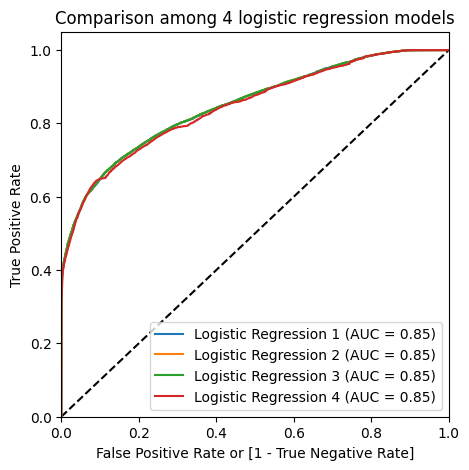

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([0, 1], [0, 1], 'k--')
metrics.RocCurveDisplay.from_estimator(logreg1, X_test_LR, y_test_LR, ax=ax, name='Logistic Regression 1')
metrics.RocCurveDisplay.from_estimator(logreg2, X_test_LR, y_test_LR, ax=ax, name='Logistic Regression 2')
metrics.RocCurveDisplay.from_estimator(logreg3, X_test_LR, y_test_LR, ax=ax, name='Logistic Regression 3')
metrics.RocCurveDisplay.from_estimator(logreg4, X_test_LR[col], y_test_LR, ax=ax, name='Logistic Regression 4')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Comparison among 4 logistic regression models')
plt.legend(loc="lower right")

Based on the above ROC curve, we can tell that these 4 Logistic regression model have similar performance (AUC = 0.85).

4th model is the best as it is the simpliest one but with the same explanatory power, say, a **"Parsimonious Model"**.

# **Decision Tree**

Similarily, Performance of the decision tree will be checked in the following metrics:

accuracy: accuracy_score
confusion matrix: confusion_matrix
precision: precision_score
recall: recall_score

In [50]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size=0.25, random_state=101)

***1st Model - Decision tree without pre-pruning and pruning***

In [51]:
from sklearn import tree
from sklearn import metrics

# Fit / train the model
dtc = tree.DecisionTreeClassifier().fit(X_train_DT, y_train_DT)

Rank the importance of each feature

In [52]:
# Get feature importances
importances = dtc.feature_importances_

# Create a pandas DataFrame with features and importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print sorted features
print(sorted_features)

                           Feature  Importance
49         deposit_type_Non Refund    0.236799
0                        lead_time    0.178993
12                             adr    0.132565
14       total_of_special_requests    0.055235
3          stays_in_total_duration    0.040016
35        market_segment_Online TA    0.039696
1             stays_in_week_nights    0.037019
8           previous_cancellations    0.032602
2          stays_in_weekend_nights    0.026430
13     required_car_parking_spaces    0.018571
10                 booking_changes    0.016338
4                           adults    0.015722
52         customer_type_Transient    0.013675
15              hotel_Resort Hotel    0.010813
43            reserved_room_type_D    0.009068
23          arrival_date_month_May    0.008362
16       arrival_date_month_August    0.008103
20         arrival_date_month_July    0.007958
21         arrival_date_month_June    0.007657
29                         meal_SC    0.007479
9   previous_

In [53]:
# Get the prediction for both train and test
pred_train = dtc.predict(X_train_DT)
pred_test = dtc.predict(X_test_DT)

In [54]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_DT, pred_train))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_DT, pred_test))
print("Precision on train is:",metrics.precision_score(y_train_DT, pred_train))
print("Precision on test is:", metrics.precision_score(y_test_DT, pred_test))
print("Recall on train is:",metrics.recall_score(y_train_DT, pred_train))
print("Recall on test is:", metrics.recall_score(y_test_DT, pred_test))
print("Accuracy on train is:",metrics.accuracy_score(y_train_DT, pred_train))
print("Accuracy on test is:", metrics.accuracy_score(y_test_DT, pred_test))

Confusion Matrix on train is:
 [[55977   197]
 [  661 32567]]
Confusion Matrix on test is:
 [[16071  2762]
 [ 2630  8338]]
Precision on train is: 0.99398730313759
Precision on test is: 0.7511711711711712
Recall on train is: 0.9801071385578428
Recall on test is: 0.7602115244347192
Accuracy on train is: 0.9904028992639986
Accuracy on test is: 0.8190664742793866


The testing accuracy is lower than the training accuracy, indicating a potential case of overfitting. To mitigate this issue, we explore the possibility of pruning and pre-pruning

***2nd Model - Decision Tree with pre-pruning (and pruning)***

We can use GridSearchCV to find the most suitable hyper-parameter in pre-pruning:

In [55]:
param_grid = {
    'max_depth': [10,20, 30],
    'min_samples_split': [20, 50, 100],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0, 10.0]
}

dtc2 = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtc2, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_DT, y_train_DT)

print(grid_search.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'ccp_alpha': 0.0, 'max_depth': 20, 'min_samples_split': 50}


Thus, we know that the best hyper-parameters are max_depth = 20 and min_sample split = 50. We need not pruning as cc_alpha = 0.

In [56]:
# Set max_depth = 20 and min_sample split = 50
dtc2 = tree.DecisionTreeClassifier(max_depth=20, min_samples_split=50).fit(X_train_DT, y_train_DT)

In [57]:
# Get the prediction for both train and test
pred_train = dtc2.predict(X_train_DT)
pred_test = dtc2.predict(X_test_DT)

In [58]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_DT,dtc2.predict(X_train_DT)))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_DT,dtc2.predict(X_test_DT)))
print("Precision on train is:",metrics.precision_score(y_train_DT,dtc2.predict(X_train_DT)))
print("Precision on test is:", metrics.precision_score(y_test_DT,dtc2.predict(X_test_DT)))
print("Recall on train is:",metrics.recall_score(y_train_DT,dtc2.predict(X_train_DT)))
print("Recall on test is:", metrics.recall_score(y_test_DT,dtc2.predict(X_test_DT)))
print("Accuracy on train is:",metrics.accuracy_score(y_train_DT,dtc2.predict(X_train_DT)))
print("Accuracy on test is:", metrics.accuracy_score(y_test_DT,dtc2.predict(X_test_DT)))

Confusion Matrix on train is:
 [[52391  3783]
 [ 9146 24082]]
Confusion Matrix on test is:
 [[17141  1692]
 [ 3410  7558]]
Precision on train is: 0.8642382917638615
Precision on test is: 0.8170810810810811
Recall on train is: 0.7247502106657037
Recall on test is: 0.6890955506929248
Accuracy on train is: 0.8553835484664772
Accuracy on test is: 0.8287976913526391


The accuracy for training and testing result are more or less the same. We tackled the overfitting issue.

Rank the importance of each feature

In [59]:
# Get feature importances
importances = dtc2.feature_importances_

# Create a pandas DataFrame with features and importances
feature_importance_df = pd.DataFrame({

    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print sorted features
print(sorted_features)

                           Feature  Importance
49         deposit_type_Non Refund    0.401896
0                        lead_time    0.123183
14       total_of_special_requests    0.084039
35        market_segment_Online TA    0.066434
12                             adr    0.063685
8           previous_cancellations    0.055193
13     required_car_parking_spaces    0.031161
52         customer_type_Transient    0.020705
10                 booking_changes    0.016483
1             stays_in_week_nights    0.014500
3          stays_in_total_duration    0.010362
15              hotel_Resort Hotel    0.010255
9   previous_bookings_not_canceled    0.010201
4                           adults    0.008269
2          stays_in_weekend_nights    0.008264
53   customer_type_Transient-Party    0.008112
29                         meal_SC    0.005723
28                         meal_HB    0.004870
39      distribution_channel_TA/TO    0.004370
16       arrival_date_month_August    0.004063
5            

**Compare two Decision Tree Model using ROC curves**

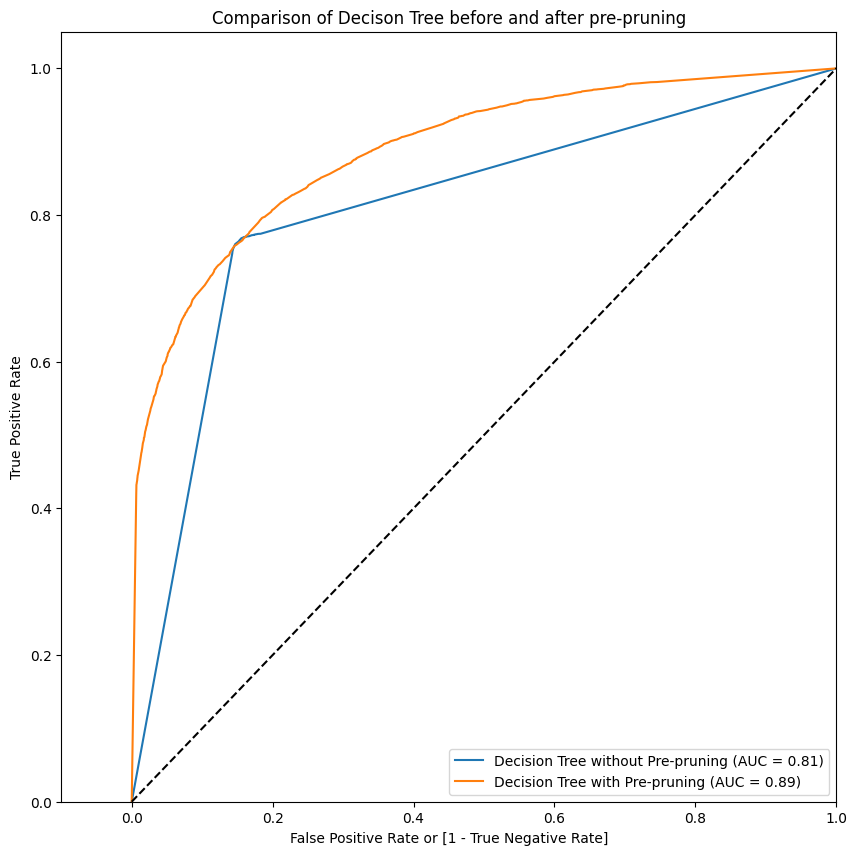

In [60]:
# Create a canva
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ROC curve for dtc
metrics.RocCurveDisplay.from_estimator(dtc, X_test_DT, y_test_DT, ax=ax, name='Decision Tree without Pre-pruning')

# Plot ROC curve for dtc2
metrics.RocCurveDisplay.from_estimator(dtc2, X_test_DT, y_test_DT, ax=ax, name='Decision Tree with Pre-pruning')

# Add a dashed line
ax.plot([0, 1], [0, 1], 'k--')

# Set limits and labels
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Decison Tree before and after pre-pruning')
plt.legend(loc="lower right")

# Show the plot
plt.show()

Thus, we can tell that the decision tree wtih pre-pruning is better (AUC = 0.88)

# **Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.3, random_state=10)

Use GridSearchCV to find the optimal hyper-parameter.

In [62]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [50, 100]
}

# Create a base model
rf = RandomForestClassifier(random_state=4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_RF, y_train_RF)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 100}


Thus, we set:

* n_estimator: 100
* min_samples_split: 50
* max_depth: 20

In [63]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=50, max_depth=20, random_state=4)
rfc.fit(X_train_RF, y_train_RF)

RandomForestClassifier(max_depth=20, min_samples_split=50, random_state=4)

In [64]:
print("accuracy on training:", metrics.accuracy_score(y_train_RF, rfc.predict(X_train_RF)))

# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_RF,rfc.predict(X_train_RF)))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_RF,rfc.predict(X_test_RF)))
print("Precision on train is:",metrics.precision_score(y_train_RF,rfc.predict(X_train_RF)))
print("Precision on test is:", metrics.precision_score(y_test_RF,rfc.predict(X_test_RF)))
print("Recall on train is:",metrics.recall_score(y_train_RF,rfc.predict(X_train_RF)))
print("Recall on test is:", metrics.recall_score(y_test_RF,rfc.predict(X_test_RF)))
print("Accuracy on train is:",metrics.accuracy_score(y_train_RF,rfc.predict(X_train_RF)))
print("Accuracy on test is:", metrics.accuracy_score(y_test_RF,rfc.predict(X_test_RF)))

accuracy on training: 0.8450180964022914
Confusion Matrix on train is:
 [[49666  2862]
 [10070 20844]]
Confusion Matrix on test is:
 [[21160  1319]
 [ 4540  8742]]
Precision on train is: 0.8792710706150342
Precision on test is: 0.8688997117582745
Recall on train is: 0.6742576179077441
Recall on test is: 0.6581840084324649
Accuracy on train is: 0.8450180964022914
Accuracy on test is: 0.8361622997119768


The accuracy of the random forest model is satisfactory. The values obtained from both the training and testing models are aligned, indicating that there is no evidence of overfitting.

In [65]:
# Get feature importances
importances = rfc.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, index=X_train_RF.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Print the feature importances
print(f_importances)

deposit_type_Non Refund           0.219914
lead_time                         0.131631
total_of_special_requests         0.109314
previous_cancellations            0.079129
adr                               0.048945
required_car_parking_spaces       0.040237
market_segment_Groups             0.034308
customer_type_Transient-Party     0.032896
booking_changes                   0.032280
market_segment_Online TA          0.031928
customer_type_Transient           0.031333
market_segment_Offline TA/TO      0.024092
stays_in_total_duration           0.021019
distribution_channel_TA/TO        0.018858
stays_in_week_nights              0.015467
hotel_Resort Hotel                0.012394
adults                            0.010281
market_segment_Direct             0.010267
distribution_channel_Direct       0.009600
stays_in_weekend_nights           0.008853
previous_bookings_not_canceled    0.006433
days_in_waiting_list              0.006358
meal_HB                           0.004649
children   

# Gradient Boosting models




Use GridsearchCV to find the optimal hyper-parameter

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 200],
    'learning_rate': [0.1, 1.0],
    'max_depth': [2, 3],
}

# Create a base model
gbt = GradientBoostingClassifier(random_state=4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_RF, y_train_RF)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 200}


Thus, we knew that the optimal:

* Learning rate = 1.0
* max_depth = 3
* n_estimators = 200

In [67]:
gbt = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=3, verbose=1).fit(X_train_RF, y_train_RF)

      Iter       Train Loss   Remaining Time 
         1           1.0019           30.50s
         2           0.8847           30.93s
         3           0.8533           30.75s
         4           0.8362           30.64s
         5           0.8233           30.78s
         6           0.8155           30.51s
         7           0.8067           30.33s
         8           0.8029           30.18s
         9           0.7989           29.99s
        10           0.7946           29.76s
        20           0.7675           28.35s
        30           0.7532           26.68s
        40           0.7441           25.12s
        50           0.7366           23.39s
        60           0.7273           21.71s
        70           0.7186           20.08s
        80           0.7116           18.47s
        90           0.7057           16.95s
       100           0.7011           15.58s
       200           0.6609            0.00s


In [68]:
# Measure the performance of the model for both train and test sets
print("Confusion Matrix on train is:\n",metrics.confusion_matrix(y_train_RF, gbt.predict(X_train_RF)))
print("Confusion Matrix on test is:\n", metrics.confusion_matrix(y_test_RF, gbt.predict(X_test_RF)))
print("Precision on train is:",metrics.precision_score(y_train_RF, gbt.predict(X_train_RF)))
print("Precision on test is:", metrics.precision_score(y_test_RF, gbt.predict(X_test_RF)))
print("Recall on train is:",metrics.recall_score(y_train_RF, gbt.predict(X_train_RF)))
print("Recall on test is:", metrics.recall_score(y_test_RF, gbt.predict(X_test_RF)))
print("Accuracy on train is:",metrics.accuracy_score(y_train_RF, gbt.predict(X_train_RF)))
print("Accuracy on test is:", metrics.accuracy_score(y_test_RF, gbt.predict(X_test_RF)))

Confusion Matrix on train is:
 [[48632  3896]
 [ 8481 22433]]
Confusion Matrix on test is:
 [[20582  1897]
 [ 4042  9240]]
Precision on train is: 0.8520262828060313
Precision on test is: 0.8296668761785041
Recall on train is: 0.7256582778029372
Recall on test is: 0.6956783616925162
Accuracy on train is: 0.8516694230723137
Accuracy on test is: 0.8339252258046476


In [69]:
importance = pd.Series(gbt.feature_importances_, index=X_train_RF.columns.values)

In [70]:
importance.sort_values(ascending=False)

deposit_type_Non Refund           0.488161
lead_time                         0.126005
total_of_special_requests         0.094011
previous_cancellations            0.065045
market_segment_Online TA          0.050622
adr                               0.040977
required_car_parking_spaces       0.027371
booking_changes                   0.017686
customer_type_Transient           0.008906
stays_in_total_duration           0.007796
hotel_Resort Hotel                0.006116
market_segment_Offline TA/TO      0.005217
previous_bookings_not_canceled    0.005191
days_in_waiting_list              0.004548
customer_type_Transient-Party     0.004440
adults                            0.004409
market_segment_Groups             0.004005
meal_SC                           0.003430
stays_in_week_nights              0.003418
arrival_date_month_October        0.002351
stays_in_weekend_nights           0.002122
meal_HB                           0.001886
distribution_channel_TA/TO        0.001834
children   

**Compare RF and GBT in ROC**

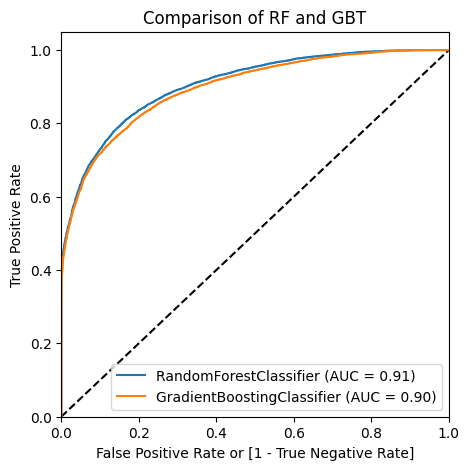

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([0, 1], [0, 1], 'k--')
metrics.RocCurveDisplay.from_estimator(rfc, X_test_RF, y_test_RF, ax=ax)
metrics.RocCurveDisplay.from_estimator(gbt, X_test_RF, y_test_RF, ax=ax)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Comparison of RF and GBT')
plt.legend(loc="lower right")

Random Forest is slightly better in terms of AUC

# Determine which model is the best fit

Compare 4 models in ROC

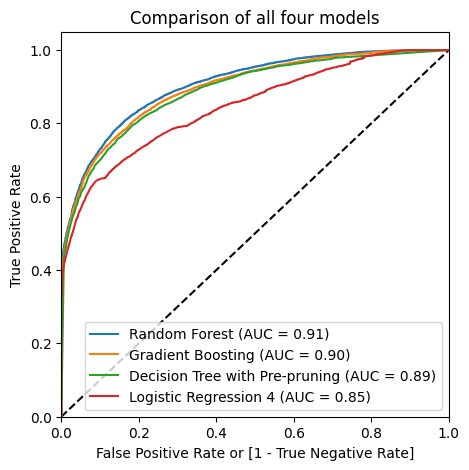

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([0, 1], [0, 1], 'k--')
metrics.RocCurveDisplay.from_estimator(rfc, X_test_RF, y_test_RF, ax=ax, name='Random Forest')
metrics.RocCurveDisplay.from_estimator(gbt, X_test_RF, y_test_RF, ax=ax, name="Gradient Boosting")
metrics.RocCurveDisplay.from_estimator(dtc2, X_test_DT, y_test_DT, ax=ax, name='Decision Tree with Pre-pruning')
metrics.RocCurveDisplay.from_estimator(logreg4, X_test_LR[col], y_test_LR, ax=ax, name='Logistic Regression 4')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Comparison of all four models')
plt.legend(loc="lower right")

Random Forest has the highest AUC among the four models. In terms of 'accuracy', it seems to be the best predictor.

However, we might have a second thought if we put business into consideration. The cost of 'false negatives' (people who cancel their bookings) is much higher than 'false positives' (people who do show up).

Therefore, we use Recall to choose the model that reduces the number of false negatives to a minimum

In [73]:
from sklearn.metrics import recall_score

# Predict using each model
y_pred_rfc = rfc.predict(X_test_RF)
y_pred_gbt = gbt.predict(X_test_RF)
y_pred_dtc2 = dtc2.predict(X_test_DT)
y_pred_logreg4 = logreg4.predict(X_test_LR[col])

# Calculate and print recall for each model
print(f"Recall (Random Forest): {recall_score(y_test_RF, y_pred_rfc)}")
print(f"Recall (Gradient Boosting): {recall_score(y_test_RF, y_pred_gbt)}")
print(f"Recall (Decision Tree with Pre-pruning): {recall_score(y_test_DT, y_pred_dtc2)}")
print(f"Recall (Logistic Regression 4): {recall_score(y_test_LR, y_pred_logreg4)}")

Recall (Random Forest): 0.6581840084324649
Recall (Gradient Boosting): 0.6956783616925162
Recall (Decision Tree with Pre-pruning): 0.6890955506929248
Recall (Logistic Regression 4): 0.5978465476997215


Thus, Gradient Boosting will be our model to deploy as it has the lowest false negative (highest Recall)